## 12 - WordCloud of  Frequently Observed Words in Positive/Negative/Neutral Articles (rated by Readers) 

In [11]:
#importing dependencies
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy
import warnings
warnings.filterwarnings('ignore')

In [12]:
#reading sheet 4 of file with scores hand assigned by readers
file=pd.read_excel("/Users/aanchalkhanna72/Downloads/Master data - for sharing.xlsm",sheet_name=4)

In [13]:
#column names
file.columns

Index([                     'Org_ID',                   'Randomise',
                    'Date_published',                      'Enc_ID',
                          'Headline',                   'Full_text',
                             'Score',                        'A_01',
                       'A_01_Status',                        'A_11',
                       'A_11_Status',                        'K_33',
                       'K_33_Status',                 'Mean Rating',
                      'Final_Status', 'Simplified Status - Pos/Neg',
                'Head_from org file',                       'Match',
              'Vader_Compound score',                'Vader_Status',
                 'LM_polarity Score',                   'LM_Status',
                  'Pattern_polarity',              'Pattern_status',
                   'Sample Vs Vader',                'Sample Vs LM',
                 'Sample Vs Pattern',               'Another check',
                                 1

In [14]:
#to see all columns
pd.set_option('display.max_columns',40)

In [15]:
#required dataframe
file=file[['Date_published','Enc_ID','Headline','Full_text','A_01','A_11','K_33','Mean Rating', 'Simplified Status - Pos/Neg']]

### Pre-processing text of both articles

In [16]:
#remove punctuation, lowercase letters, special characters remove
def wo_punc(msg):
  import string
  pattern=string.punctuation
  spec_char=['\n','£','~', ':', "'", '+', '[', '\\', '@', '^', '{', '%', '(', '-', '"', '*', '|', ',', '&', '<', '`', '}', '.', '_', '=', ']', '!', '>', ';', '?', '#', '$', ')', '/']
  for i in msg:
    if i in pattern and spec_char:
      msg=re.sub('\n','',msg)
      msg=msg.lower()
      msg=msg.replace(i,' ')
  return msg

In [17]:
file['wo_punc']=file['Full_text'].apply(wo_punc)

In [315]:
#removing stopwords and short words (less than 2 characters)
def rmv_short_stop(txt):
    stop_words=stopwords.words("english") 
    result=[]
    txt=txt.split()
    for i in txt:
        if len(i)>=3 and i not in stop_words:
          result.append(i)
    return result

In [19]:
#new column with removed short/stop words
file['text_wo_punc_short_stop']=file['wo_punc'].apply(rmv_short_stop)

In [20]:
file.iloc[367]['Full_text']

'ReutersNifty continues to climb a wall of worry as it looks to be in the final leg of its rally before heading for a correction.Shares of Apollo Hospitals Enterprise Ltd. slipped 3.87 per cent to Rs 4560.35 in Monday\'s trade. It hit a high of Rs 4739.75 and low of Rs 4540.05 during the session. \n\n On the technical charts, the 200-DMA of the stock stood at Rs 4610.16, while the 50-DMA was at Rs 4642.83. If a stock trades above 50-DMA and 200-DMA, it usually means the immediate trend is upward. On the other hand, if the stock trades below 50-DMA and 200-DMA, it is considered a bearish trend and if trades between these averages, then it suggests the stock can go either way. \n\n The stock traded above the signal line of momentum indicator moving average convergence divergence, or MACD, signalling a bullish bias on the counter. The MACD is known for signalling trend reversal in traded securities or indices. It is the difference between the 26-day and 12-day exponential moving averages.

In [21]:
file.iloc[367]['text_wo_punc_short_stop']

['reutersnifty',
 'continues',
 'climb',
 'wall',
 'worry',
 'looks',
 'final',
 'leg',
 'rally',
 'heading',
 'correction',
 'shares',
 'apollo',
 'hospitals',
 'enterprise',
 'ltd',
 'slipped',
 'per',
 'cent',
 '4560',
 'monday',
 'trade',
 'hit',
 'high',
 '4739',
 'low',
 '4540',
 'session',
 'technical',
 'charts',
 '200',
 'dma',
 'stock',
 'stood',
 '4610',
 'dma',
 '4642',
 'stock',
 'trades',
 'dma',
 '200',
 'dma',
 'usually',
 'means',
 'immediate',
 'trend',
 'upward',
 'hand',
 'stock',
 'trades',
 'dma',
 '200',
 'dma',
 'considered',
 'bearish',
 'trend',
 'trades',
 'averages',
 'suggests',
 'stock',
 'either',
 'way',
 'stock',
 'traded',
 'signal',
 'line',
 'momentum',
 'indicator',
 'moving',
 'average',
 'convergence',
 'divergence',
 'macd',
 'signalling',
 'bullish',
 'bias',
 'counter',
 'macd',
 'known',
 'signalling',
 'trend',
 'reversal',
 'traded',
 'securities',
 'indices',
 'difference',
 'day',
 'day',
 'exponential',
 'moving',
 'averages',
 'nine',
 '

In [22]:
#lemmatization not taken into account as we don't want to reduce words to their base
#lemmatizer = WordNetLemmatizer()
#file['lemmatized_text'] = file['text_wo_punc_short_stop'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # lemmatizing
#lemmatized_resume = lemmatizer.lemmatize(docs)  # lemmatizing

In [155]:
#file.iloc[367]['lemmatized_text']

In [24]:
#joining back words from a list
def join_list_words(lst):
  new=''
  for i in lst:
    new=" ".join(lst)
  return new

In [25]:
#file['lemma_text_joined']=file['lemmatized_text'].apply(join_list_words)

In [26]:
file['text_wo_punc_short_stop_joined']=file['text_wo_punc_short_stop'].apply(join_list_words)

In [27]:
#file.iloc[367]['lemma_text_joined']

'reutersnifty continues climb wall worry look final leg rally heading correction share apollo hospital enterprise ltd slipped per cent 4560 monday trade hit high 4739 low 4540 session technical chart 200 dma stock stood 4610 dma 4642 stock trade dma 200 dma usually mean immediate trend upward hand stock trade dma 200 dma considered bearish trend trade average suggests stock either way stock traded signal line momentum indicator moving average convergence divergence macd signalling bullish bias counter macd known signalling trend reversal traded security index difference day day exponential moving average nine day exponential moving average called signal line plotted top macd reflect buy sell opportunity hand relative strength index rsi stock stand traditionally stock considered overbought rsi value oversold return equity roe stock stood per cent return capital employed roce roce financial ratio determines company profitability efficiency capital use roe measure profitability business r

In [32]:
file.iloc[367]['text_wo_punc_short_stop']

['reutersnifty',
 'continues',
 'climb',
 'wall',
 'worry',
 'looks',
 'final',
 'leg',
 'rally',
 'heading',
 'correction',
 'shares',
 'apollo',
 'hospitals',
 'enterprise',
 'ltd',
 'slipped',
 'per',
 'cent',
 '4560',
 'monday',
 'trade',
 'hit',
 'high',
 '4739',
 'low',
 '4540',
 'session',
 'technical',
 'charts',
 '200',
 'dma',
 'stock',
 'stood',
 '4610',
 'dma',
 '4642',
 'stock',
 'trades',
 'dma',
 '200',
 'dma',
 'usually',
 'means',
 'immediate',
 'trend',
 'upward',
 'hand',
 'stock',
 'trades',
 'dma',
 '200',
 'dma',
 'considered',
 'bearish',
 'trend',
 'trades',
 'averages',
 'suggests',
 'stock',
 'either',
 'way',
 'stock',
 'traded',
 'signal',
 'line',
 'momentum',
 'indicator',
 'moving',
 'average',
 'convergence',
 'divergence',
 'macd',
 'signalling',
 'bullish',
 'bias',
 'counter',
 'macd',
 'known',
 'signalling',
 'trend',
 'reversal',
 'traded',
 'securities',
 'indices',
 'difference',
 'day',
 'day',
 'exponential',
 'moving',
 'averages',
 'nine',
 '

In [40]:
#create spacy object
nlp = spacy.load("en_core_web_sm")

#input joined words - not a list
doc = nlp(file.iloc[367]['text_wo_punc_short_stop_joined'])
  
# Token and Tag
#for token in doc:
#print(token, token.pos_)
  
# You want list of unique Verb tokens
print("Verbs:", [set(token.text for token in doc if token.pos_ == "VERB")])
print("Adverbs:", [set(token.text for token in doc if token.pos_ == "ADV")])
print("Adjectives:", [set(token.text for token in doc if token.pos_ == "ADJ")])

Verbs: [{'plotted', 'determines', 'stood', 'signalling', 'buy', 'considered', 'looks', 'moving', 'suggests', 'known', 'continues', 'oversold', 'slipped', 'employed', 'means', 'stands', 'hit', 'traded', 'measure', 'called', 'reflect', 'heading'}]
Adverbs: [{'traditionally', 'usually'}]
Adjectives: [{'upward', 'financial', 'immediate', 'low', 'roce', 'top', 'average', 'relative', 'high', 'bearish', 'technical', 'final', 'bullish'}]


In [82]:
#creating a function to obtain verbs from text
def pos_tagging_verb(text):
    nlp = spacy.load("en_core_web_sm")
    doc=nlp(text)
    return set(token.text for token in doc if token.pos_ == "VERB")

In [85]:
#creating a function to obtain adverbs from text
def pos_tagging_adverb(text):
    nlp = spacy.load("en_core_web_sm")
    doc=nlp(text)
    return set(token.text for token in doc if token.pos_ == "ADV")

In [88]:
#creating a function to obtain adjectives from text
def pos_tagging_adj(text):
    nlp = spacy.load("en_core_web_sm")
    doc=nlp(text)
    return set(token.text for token in doc if token.pos_ == "ADJ")

In [83]:
#applying function to find verbs in each row 
file['Verbs']=file['text_wo_punc_short_stop_joined'].apply(pos_tagging_verb)

In [87]:
#applying function to find adverbs in each row
file['Adverbs']=file['text_wo_punc_short_stop_joined'].apply(pos_tagging_adverb)

In [90]:
#applying function to find adjectives in each row
file['Adjectives']=file['text_wo_punc_short_stop_joined'].apply(pos_tagging_adj)

In [121]:
file['verbs_joined']=file['Verbs'].apply(join_list_words)

In [123]:
file['adverbs_joined']=file['Adverbs'].apply(join_list_words)

In [124]:
file['adjec_joined']=file['Adjectives'].apply(join_list_words)

In [125]:
#segregating positive,neutral and negative news articles 
neg=file[file['Simplified Status - Pos/Neg']=='Negative']
pos=file[file['Simplified Status - Pos/Neg']=='Positive']
neu=file[file['Simplified Status - Pos/Neg']=='Neutral']

In [18]:
#checking text with and without lemmatization
#a=set(file.iloc[367]['lemmatized_text'])
#b=set(file.iloc[367]['text_wo_punc_short_stop'])
#len(a),len(b)
#a.difference(b)
#b.difference(a)

In [136]:
file

Date_published    Enc_ID  \
0       2022-06-21    620220   
1       2022-04-19    420221   
2       2022-05-27    520222   
3       2022-04-06    420223   
4       2022-06-14    620224   
..             ...       ...   
395     2022-06-10  62022395   
396     2022-06-29  62022396   
397     2022-06-06  62022397   
398     2022-05-16  52022398   
399     2022-05-27  52022399   

                                              Headline  \
0    Banks holding on to subsidy share, say payment...   
1    Digitally ready Bank of Baroda aims to click o...   
2    Karnataka attracted investment commitment of R...   
3    Splitting of provident fund accounts may be de...   
4    Irdai weighs proposal to privatise Insurance I...   
..                                                 ...   
395      Banks take a cue from RBI, hike lending rates   
396  Sebi issues Rs 27 lakh recovery notice to indi...   
397  Apollo Hospital shares  drop  0.68% as Sensex ...   
398  SBI at Rs 710? What makes analysts see up to 5...   
399  Stock market update: Mining stocks  up  as mar...   

                                             Full_text  A_01  A_11  K_33  \
0    ReutersPayments companies and banks are at log...    -1    -1    -2   
1    AgenciesThe bank presently has 20 million acti...     1     1     2   
2    PTIKarnataka Chief Minister Basavaraj Bommai.K...     1     1     2   
3    Getty ImagesThe budget for FY22 had imposed in...    -1    -1    -2   
4    AgenciesThere is a view in the insurance indus...     1     0     2   
..                                                 ...   ...   ...   ...   
395  PTIICICI Bank, Bank of Baroda, Punjab National...    -1    -1    -1   
396  ReutersThe logo of the Securities and Exchange...    -1     0    -1   
397  Getty ImagesShrikant Chouhan of Kotak Securiti...     0    -1    -1   
398  AgenciesThe PSU bank reported a 41.27 per cent...     2     1     2   
399  Shutterstock.comAgarwal said the global econom...     1     1     1   

     Mean Rating Simplified Status - Pos/Neg  \
0      -1.333333                    Negative   
1       1.333333                    Positive   
2       1.333333                    Positive   
3      -1.333333                    Negative   
4       1.000000                    Positive   
..           ...                         ...   
395    -1.000000                    Negative   
396    -0.666667                    Negative   
397    -0.666667                    Negative   
398     1.666667                    Positive   
399     1.000000                    Positive   

                                               wo_punc  \
0    reuterspayments companies and banks are at log...   
1    agenciesthe bank presently has 20 million acti...   
2    ptikarnataka chief minister basavaraj bommai k...   
3    getty imagesthe budget for fy22 had imposed in...   
4    agenciesthere is a view in the insurance indus...   
..                                                 ...   
395  ptiicici bank  bank of baroda  punjab national...   
396  reutersthe logo of the securities and exchange...   
397  getty imagesshrikant chouhan of kotak securiti...   
398  agenciesthe psu bank reported a 41 27 per cent...   
399  shutterstock comagarwal said the global econom...   

                               text_wo_punc_short_stop  \
0    [reuterspayments, companies, banks, loggerhead...   
1    [agenciesthe, bank, presently, million, active...   
2    [ptikarnataka, chief, minister, basavaraj, bom...   
3    [getty, imagesthe, budget, fy22, imposed, inco...   
4    [agenciesthere, view, insurance, industry, iib...   
..                                                 ...   
395  [ptiicici, bank, bank, baroda, punjab, nationa...   
396  [reutersthe, logo, securities, exchange, board...   
397  [getty, imagesshrikant, chouhan, kotak, securi...   
398  [agenciesthe, psu, bank, reported, per, cent, ...   
399  [shutterstock, comagarwal, said, global, econo...   

                                      

### Finding most frequently occurring words in negative articles 

In [157]:
import os
os.chdir("/Users/aanchalkhanna72/Desktop/Capstone/Experiments/Exp-12")

In [158]:
#not using lemmatized as it removes endings and prevents adjectives from being noticed
all_neg_words=' '.join([text for text in neg['text_wo_punc_short_stop_joined']])

Text(0.5, 1.0, 'Most Frequently Occurring Words in Negative Articles')

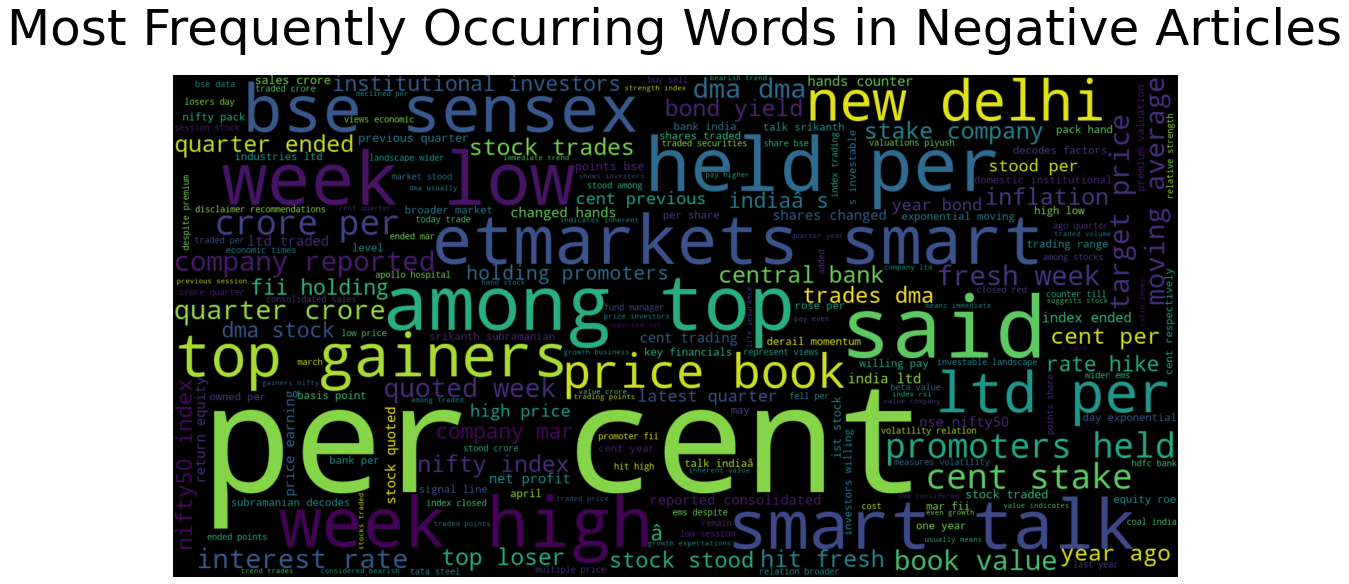

In [293]:
plt.figure(figsize=(18,18))
cloud=WordCloud(max_words=200,width=1600,height=800,collocation_threshold=10).generate(all_neg_words)
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequently Occurring Words in Negative Articles", fontsize=50,pad=30)

In [114]:
all_pos_words=' '.join([text for text in pos['text_wo_punc_short_stop_joined']])

Text(0.5, 1.0, 'Most Frequently Occurring Words in Positive Articles')

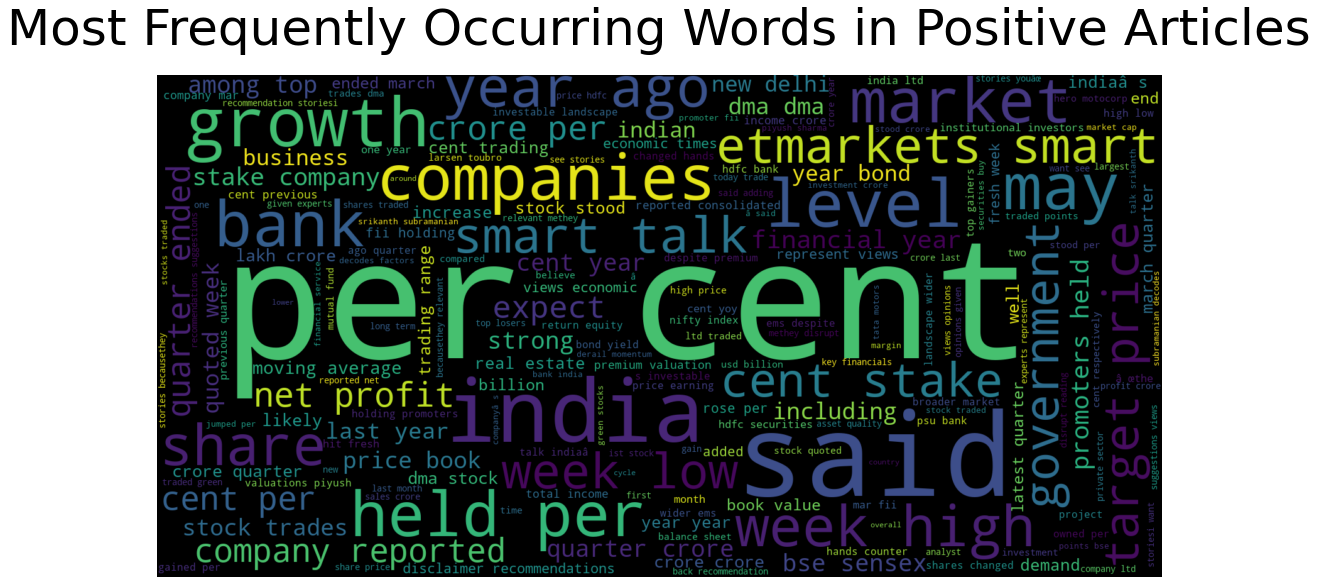

In [292]:
plt.figure(figsize=(18,18))
cloud=WordCloud(max_words=200,width=1600,height=800,collocation_threshold=10).generate(all_pos_words)
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequently Occurring Words in Positive Articles", fontsize=50,pad=30)

In [116]:
all_neu_words=' '.join([text for text in neu['text_wo_punc_short_stop_joined']])

Text(0.5, 1.0, 'Most Frequently Occurring Words in Neutral Articles')

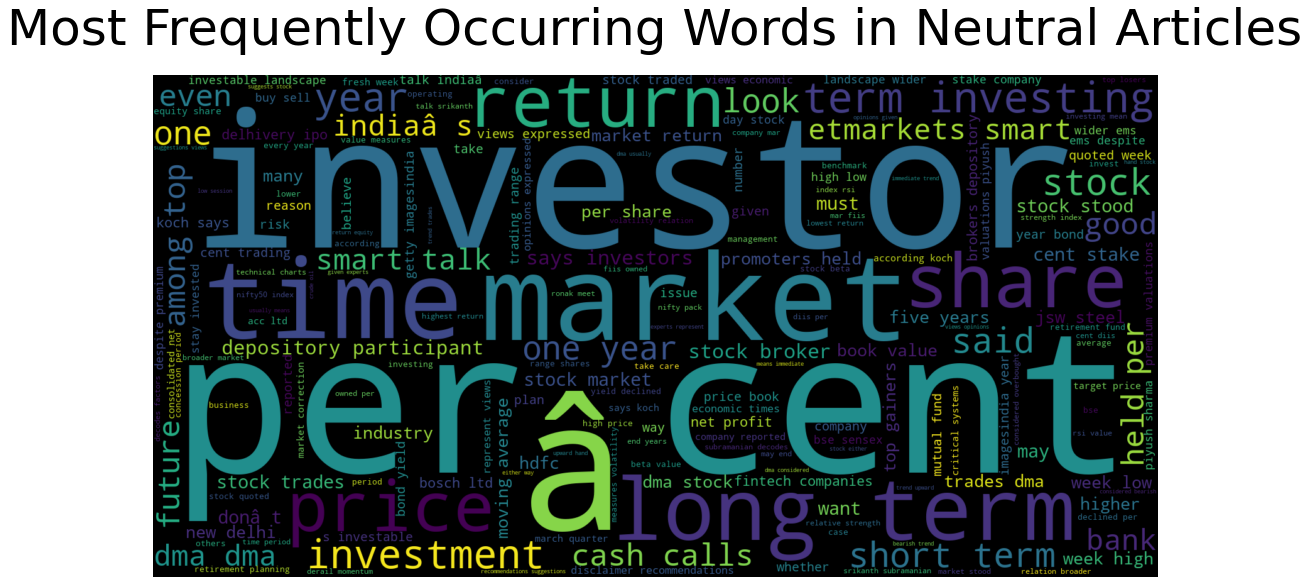

In [291]:
plt.figure(figsize=(18,18))
cloud=WordCloud(max_words=200,width=1600,height=800,collocation_threshold=10).generate(all_neu_words)
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequently Occurring Words in Neutral Articles", fontsize=50,pad=30)

### Making Word Clouds with Pos-tagged Verbs

In [308]:
#has better words than nltk
stopwords_spacy = nlp.Defaults.stop_words

In [322]:
from nltk.corpus import stopwords
stopwords_nltk=stopwords.words("english")

In [330]:
my_stopwords=set(stopwords_nltk).union(stopwords_spacy)

In [331]:
#finding most frequently appearing verbs in negative articles
neg_verbs=' '.join([text for text in neg['verbs_joined']])

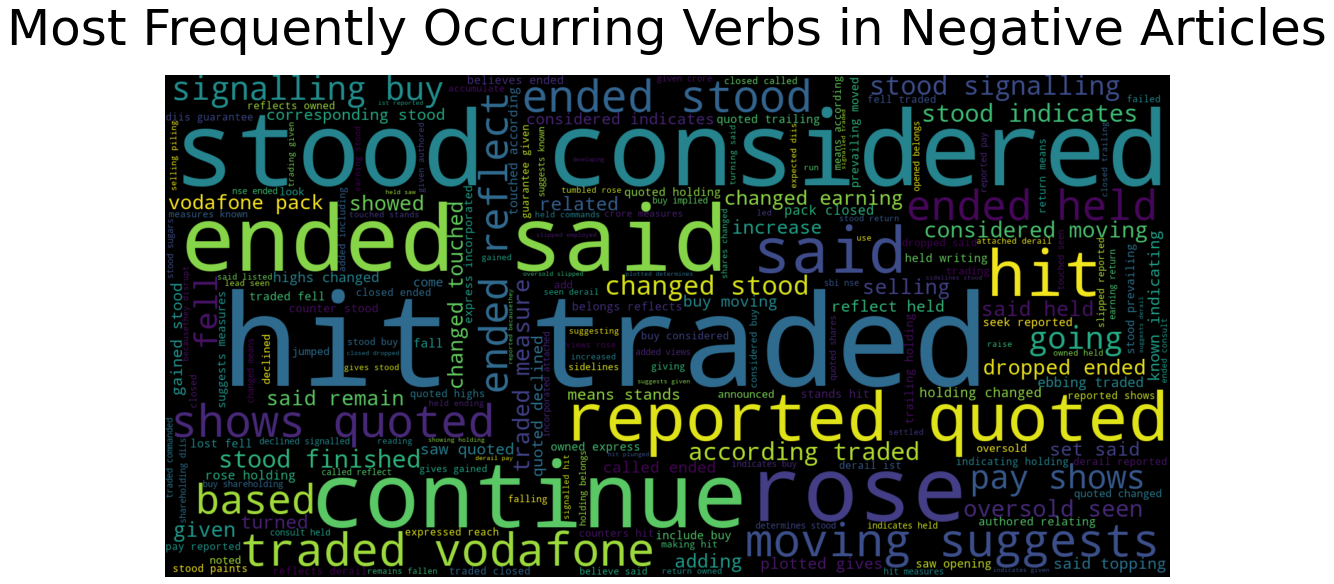

In [333]:
plt.figure(figsize=(18,18))
cloud=WordCloud(max_words=200,width=1600,height=800,collocation_threshold=10,stopwords=my_stopwords).generate(neg_verbs)
plt.imshow(cloud,interpolation='bilinear')
plt.title("Most Frequently Occurring Verbs in Negative Articles", fontsize=50,pad=30)
plt.axis('off')
plt.savefig("neg_verbs")

In [359]:
#dictionary of top 100 negative verbs
negverbs_text_dict=cloud.process_text(neg_verbs)
negverbs_word_frequency={k: v for k,v in sorted(negverbs_text_dict.items(),reverse=True, key=lambda item: item[1])}
top_100_neg_verbs=list(negverbs_word_frequency.items())[:100]

In [360]:
top_100_neg_verbs

[('hit traded', 36),
 ('stood considered', 25),
 ('rose', 19),
 ('continue', 19),
 ('ended said', 19),
 ('reported quoted', 19),
 ('said', 17),
 ('hit', 17),
 ('moving suggests', 17),
 ('traded vodafone', 17),
 ('shows quoted', 16),
 ('ended stood', 16),
 ('ended held', 14),
 ('based', 13),
 ('ended reflect', 12),
 ('signalling buy', 12),
 ('pay shows', 12),
 ('going', 11),
 ('fell', 11),
 ('stood signalling', 11),
 ('changed stood', 11),
 ('according traded', 11),
 ('stood finished', 11),
 ('stood indicates', 11),
 ('oversold seen', 10),
 ('traded measure', 10),
 ('considered moving', 10),
 ('given', 9),
 ('selling', 9),
 ('showed', 9),
 ('dropped ended', 9),
 ('said held', 9),
 ('said remain', 9),
 ('changed touched', 9),
 ('changed earning', 9),
 ('vodafone pack', 9),
 ('related', 8),
 ('adding', 8),
 ('turned', 8),
 ('increase', 8),
 ('set said', 8),
 ('corresponding stood', 8),
 ('buy moving', 8),
 ('plotted gives', 8),
 ('known indicating', 8),
 ('called ended', 8),
 ('reflect he

In [336]:
neu_verbs=' '.join([text for text in neu['verbs_joined']])

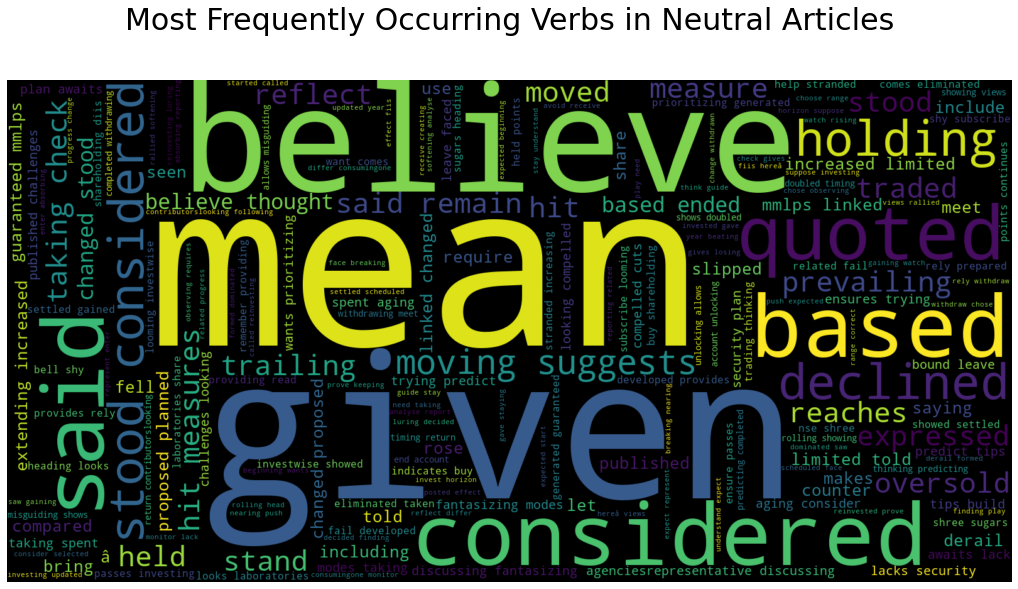

In [337]:
plt.figure(figsize=(18,18))
cloud=WordCloud(max_words=200,width=1600,height=800,collocation_threshold=10,stopwords=my_stopwords).generate(neu_verbs)
plt.imshow(cloud,interpolation='bilinear')
plt.title("Most Frequently Occurring Verbs in Neutral Articles", fontsize=30, pad=50)
plt.axis('off')
plt.savefig("neu_verbs")

In [338]:
#dictionary of top 100 neutral verbs
neuverbs_text_dict=cloud.process_text(neu_verbs)
neuverbs_word_frequency={k: v for k,v in sorted(neuverbs_text_dict.items(),reverse=True, key=lambda item: item[1])}
top_100_neu_verbs=list(neuverbs_word_frequency.items())[:100]

In [339]:
top_100_neu_verbs

[('mean', 6),
 ('given', 6),
 ('believe', 4),
 ('considered', 4),
 ('said', 4),
 ('based', 4),
 ('quoted', 3),
 ('declined', 3),
 ('holding', 3),
 ('stood considered', 3),
 ('moving suggests', 3),
 ('expressed', 2),
 ('stood', 2),
 ('prevailing', 2),
 ('oversold', 2),
 ('traded', 2),
 ('trailing', 2),
 ('held', 2),
 ('reflect', 2),
 ('hit', 2),
 ('stand', 2),
 ('moved', 2),
 ('reaches', 2),
 ('measure', 2),
 ('taking check', 2),
 ('hit measures', 2),
 ('said remain', 2),
 ('believe thought', 2),
 ('based ended', 2),
 ('changed stood', 2),
 ('told', 1),
 ('saying', 1),
 ('require', 1),
 ('meet', 1),
 ('use', 1),
 ('published', 1),
 ('seen', 1),
 ('share', 1),
 ('bring', 1),
 ('â', 1),
 ('derail', 1),
 ('fell', 1),
 ('including', 1),
 ('makes', 1),
 ('compared', 1),
 ('let', 1),
 ('include', 1),
 ('rose', 1),
 ('slipped', 1),
 ('counter', 1),
 ('extending increased', 1),
 ('increased limited', 1),
 ('limited told', 1),
 ('guaranteed mmlps', 1),
 ('mmlps linked', 1),
 ('linked changed', 1

In [340]:
pos_verbs=' '.join([text for text in pos['verbs_joined']])

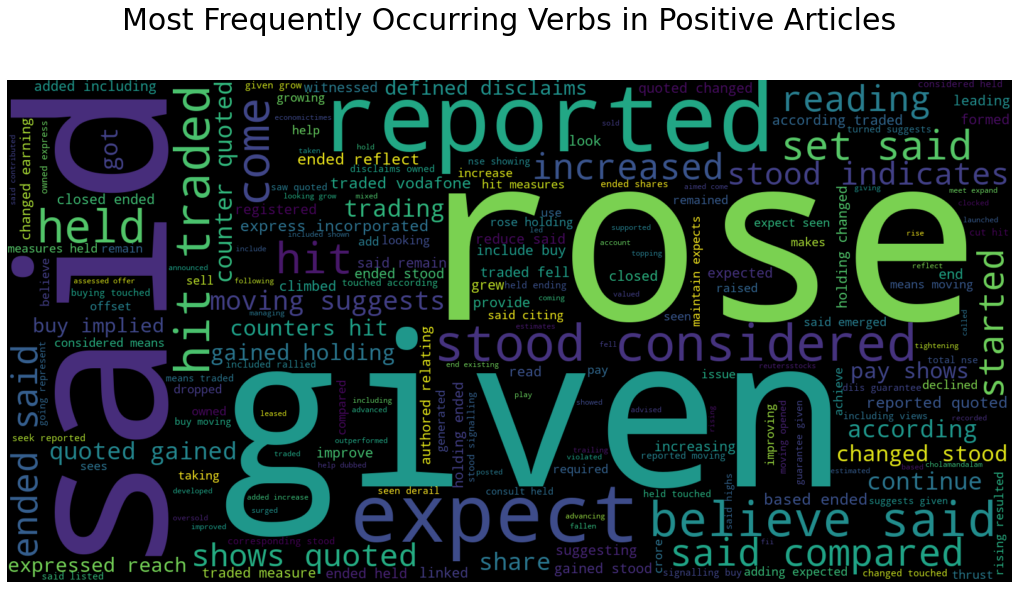

In [341]:
plt.figure(figsize=(18,18))
cloud=WordCloud(max_words=200,width=1600,height=800,collocation_threshold=10,stopwords=my_stopwords).generate(pos_verbs)
plt.title("Most Frequently Occurring Verbs in Positive Articles", fontsize=30, pad=50)
plt.axis('off')
plt.imshow(cloud,interpolation='bilinear')
plt.savefig("pos_verbs")

In [342]:
#dictionary of top 100 positive verbs
posverbs_text_dict=cloud.process_text(pos_verbs)
posverbs_word_frequency={k: v for k,v in sorted(posverbs_text_dict.items(),reverse=True, key=lambda item: item[1])}
top_100_pos_verbs=list(posverbs_word_frequency.items())[:100]

In [343]:
top_100_pos_verbs

[('rose', 24),
 ('given', 19),
 ('said', 18),
 ('reported', 17),
 ('expect', 12),
 ('stood considered', 11),
 ('believe said', 10),
 ('hit traded', 10),
 ('come', 9),
 ('held', 9),
 ('hit', 8),
 ('set said', 7),
 ('said compared', 7),
 ('started', 6),
 ('reading', 6),
 ('increased', 6),
 ('ended said', 6),
 ('stood indicates', 6),
 ('shows quoted', 6),
 ('moving suggests', 6),
 ('according', 5),
 ('got', 5),
 ('trading', 5),
 ('share', 5),
 ('continue', 5),
 ('counter quoted', 5),
 ('quoted gained', 5),
 ('gained holding', 5),
 ('changed stood', 5),
 ('counters hit', 5),
 ('pay shows', 5),
 ('expressed reach', 5),
 ('buy implied', 5),
 ('defined disclaims', 5),
 ('express incorporated', 5),
 ('traded vodafone', 5),
 ('based ended', 5),
 ('ended reflect', 5),
 ('reported quoted', 5),
 ('end', 4),
 ('expected', 4),
 ('provide', 4),
 ('registered', 4),
 ('grew', 4),
 ('linked', 4),
 ('witnessed', 4),
 ('increasing', 4),
 ('look', 4),
 ('leading', 4),
 ('read', 4),
 ('improve', 4),
 ('form

### Making Word Clouds with Pos-tagged Adverbs

In [344]:
#finding most frequently appearing verbs in negative articles
neg_adverbs=' '.join([text for text in neg['adverbs_joined']])

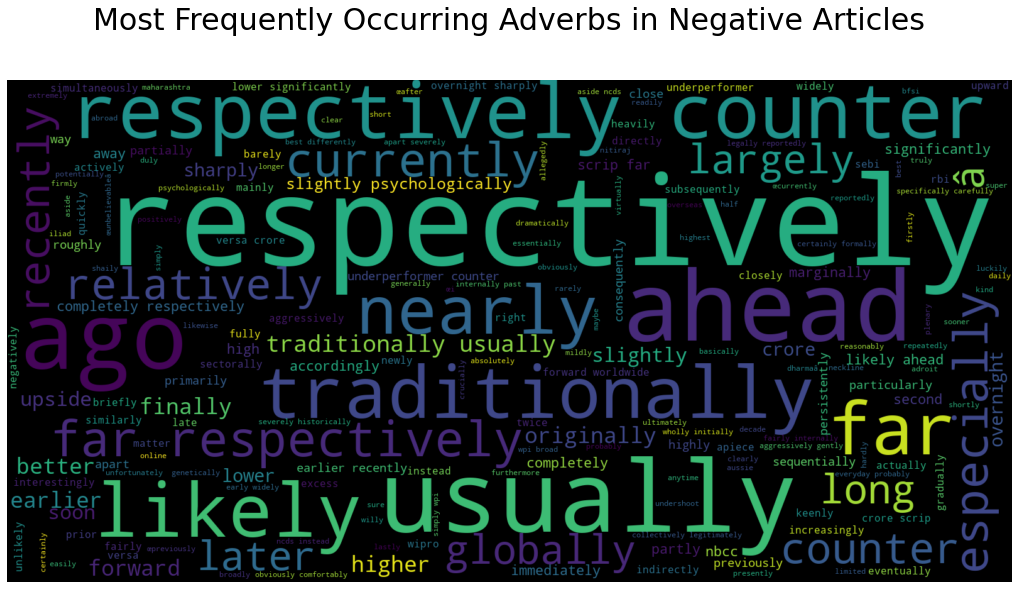

In [345]:
plt.figure(figsize=(18,18))
cloud=WordCloud(max_words=200,width=1600,height=800,collocation_threshold=10,stopwords=my_stopwords).generate(neg_adverbs)
plt.imshow(cloud,interpolation='bilinear')
plt.title("Most Frequently Occurring Adverbs in Negative Articles", fontsize=30, pad=50)
plt.axis('off')
plt.savefig("neg_adverbs")

In [351]:
#dictionary of top 100 negative adverbs
negadverbs_text_dict=cloud.process_text(neg_adverbs)
negadverbs_word_frequency={k: v for k,v in sorted(negadverbs_text_dict.items(),reverse=True, key=lambda item: item[1])}
top_100_neg_adverbs=list(negadverbs_word_frequency.items())[:100]

In [352]:
top_100_neg_adverbs

[('respectively', 30),
 ('usually', 18),
 ('ahead', 17),
 ('ago', 16),
 ('respectively counter', 16),
 ('likely', 15),
 ('far', 14),
 ('traditionally', 14),
 ('nearly', 12),
 ('far respectively', 12),
 ('currently', 11),
 ('especially', 11),
 ('relatively', 9),
 ('recently', 9),
 ('counter', 9),
 ('later', 8),
 ('largely', 8),
 ('globally', 8),
 ('long', 8),
 ('â', 8),
 ('traditionally usually', 8),
 ('earlier', 7),
 ('finally', 7),
 ('originally', 7),
 ('forward', 7),
 ('higher', 7),
 ('better', 7),
 ('soon', 6),
 ('slightly', 6),
 ('upside', 6),
 ('lower', 5),
 ('sharply', 5),
 ('crore', 5),
 ('overnight', 5),
 ('slightly psychologically', 5),
 ('significantly', 4),
 ('high', 4),
 ('marginally', 4),
 ('second', 4),
 ('away', 4),
 ('partly', 4),
 ('immediately', 4),
 ('completely', 4),
 ('accordingly', 4),
 ('nbcc', 4),
 ('likely ahead', 4),
 ('scrip far', 4),
 ('completely respectively', 4),
 ('apart', 3),
 ('primarily', 3),
 ('particularly', 3),
 ('persistently', 3),
 ('way', 3),
 (

In [168]:
neu_adverbs=' '.join([text for text in neu['adverbs_joined']])

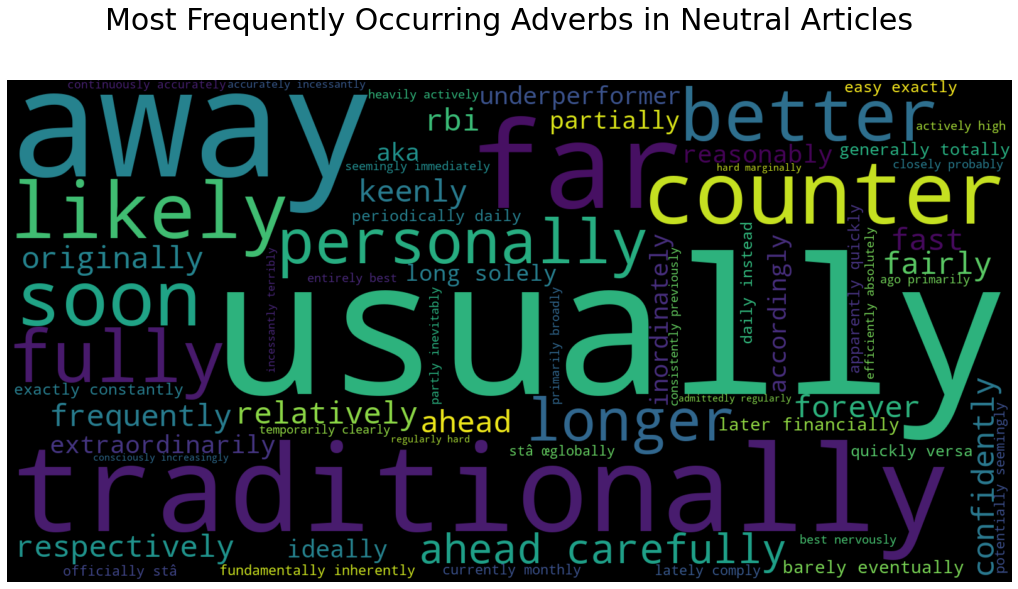

In [347]:
plt.figure(figsize=(18,18))
cloud=WordCloud(max_words=200,width=1600,height=800,collocation_threshold=10,stopwords=my_stopwords).generate(neu_adverbs)
plt.title("Most Frequently Occurring Adverbs in Neutral Articles", fontsize=30, pad=50)
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.savefig("neu_adverbs")

In [353]:
#dictionary of top 100 neutral adverbs
neuadverbs_text_dict=cloud.process_text(neu_adverbs)
neuadverbs_word_frequency={k: v for k,v in sorted(neuadverbs_text_dict.items(),reverse=True, key=lambda item: item[1])}
top_100_neu_adverbs=list(neuadverbs_word_frequency.items())[:100]

In [354]:
top_100_neu_adverbs

[('usually', 5),
 ('away', 3),
 ('traditionally', 3),
 ('far', 3),
 ('counter', 2),
 ('likely', 2),
 ('soon', 2),
 ('fully', 2),
 ('better', 2),
 ('personally', 2),
 ('longer', 2),
 ('ahead carefully', 2),
 ('forever', 1),
 ('ahead', 1),
 ('respectively', 1),
 ('frequently', 1),
 ('keenly', 1),
 ('rbi', 1),
 ('fast', 1),
 ('originally', 1),
 ('confidently', 1),
 ('relatively', 1),
 ('fairly', 1),
 ('extraordinarily', 1),
 ('reasonably', 1),
 ('underperformer', 1),
 ('ideally', 1),
 ('accordingly', 1),
 ('partially', 1),
 ('inordinately', 1),
 ('aka', 1),
 ('long solely', 1),
 ('later financially', 1),
 ('barely eventually', 1),
 ('generally totally', 1),
 ('periodically daily', 1),
 ('daily instead', 1),
 ('easy exactly', 1),
 ('exactly constantly', 1),
 ('apparently quickly', 1),
 ('quickly versa', 1),
 ('fundamentally inherently', 1),
 ('currently monthly', 1),
 ('officially stâ', 1),
 ('stâ œglobally', 1),
 ('lately comply', 1),
 ('potentially seemingly', 1),
 ('seemingly immediatel

In [355]:
pos_adverbs=' '.join([text for text in pos['adverbs_joined']])

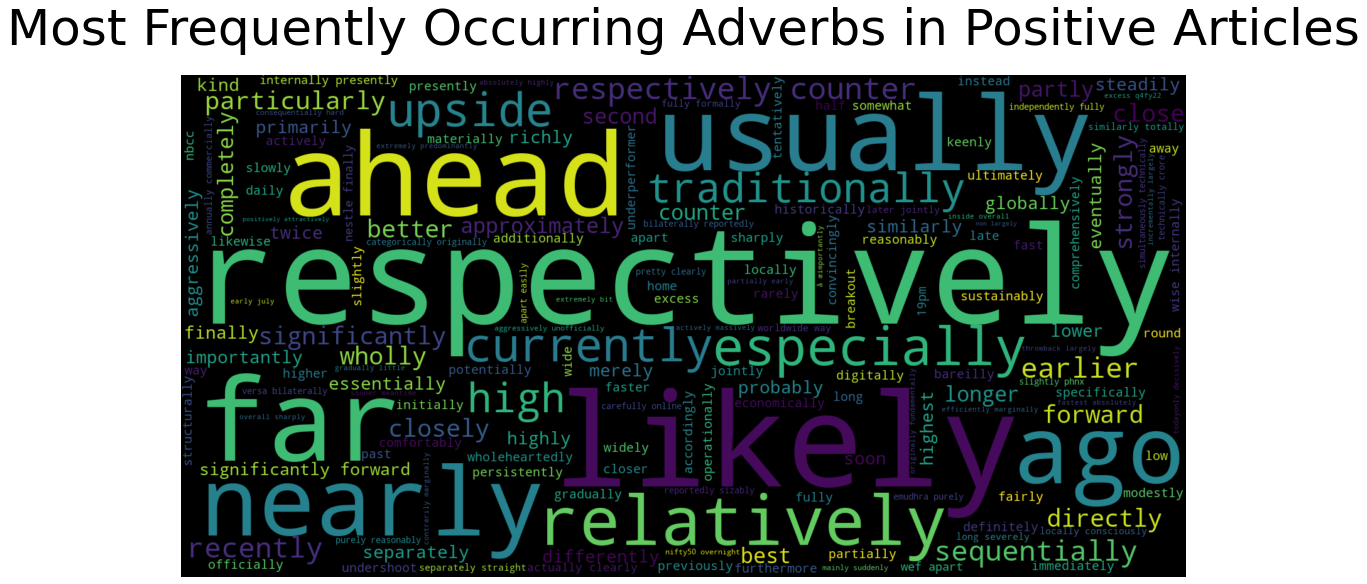

In [356]:
plt.figure(figsize=(18,18))
cloud=WordCloud(max_words=200,width=1600,height=800,collocation_threshold=10,stopwords=my_stopwords).generate(pos_adverbs)
plt.title("Most Frequently Occurring Adverbs in Positive Articles", fontsize=50,pad=30)
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.savefig("pos_adverbs")

In [357]:
#dictionary of top 100 positive adverbs
posadverbs_text_dict=cloud.process_text(pos_adverbs)
posadverbs_word_frequency={k: v for k,v in sorted(posadverbs_text_dict.items(),reverse=True, key=lambda item: item[1])}
top_100_pos_adverbs=list(posadverbs_word_frequency.items())[:100]

In [358]:
top_100_pos_adverbs

[('respectively', 23),
 ('likely', 21),
 ('ahead', 16),
 ('far', 16),
 ('usually', 13),
 ('nearly', 11),
 ('ago', 11),
 ('relatively', 8),
 ('especially', 7),
 ('currently', 7),
 ('upside', 7),
 ('traditionally', 6),
 ('high', 6),
 ('respectively counter', 6),
 ('recently', 5),
 ('earlier', 5),
 ('sequentially', 5),
 ('particularly', 4),
 ('significantly', 4),
 ('better', 4),
 ('closely', 4),
 ('forward', 4),
 ('directly', 4),
 ('wholly', 4),
 ('close', 4),
 ('strongly', 4),
 ('best', 3),
 ('partly', 3),
 ('longer', 3),
 ('approximately', 3),
 ('second', 3),
 ('counter', 3),
 ('completely', 3),
 ('twice', 2),
 ('finally', 2),
 ('separately', 2),
 ('primarily', 2),
 ('highly', 2),
 ('similarly', 2),
 ('highest', 2),
 ('globally', 2),
 ('probably', 2),
 ('differently', 2),
 ('steadily', 2),
 ('eventually', 2),
 ('essentially', 2),
 ('kind', 2),
 ('soon', 2),
 ('richly', 2),
 ('importantly', 2),
 ('aggressively', 2),
 ('lower', 2),
 ('merely', 2),
 ('significantly forward', 2),
 ('digital

### Making Word Clouds with Pos-tagged Adjectives

In [172]:
#finding most frequently appearing verbs in negative articles
neg_adj=' '.join([text for text in neg['adjec_joined']])

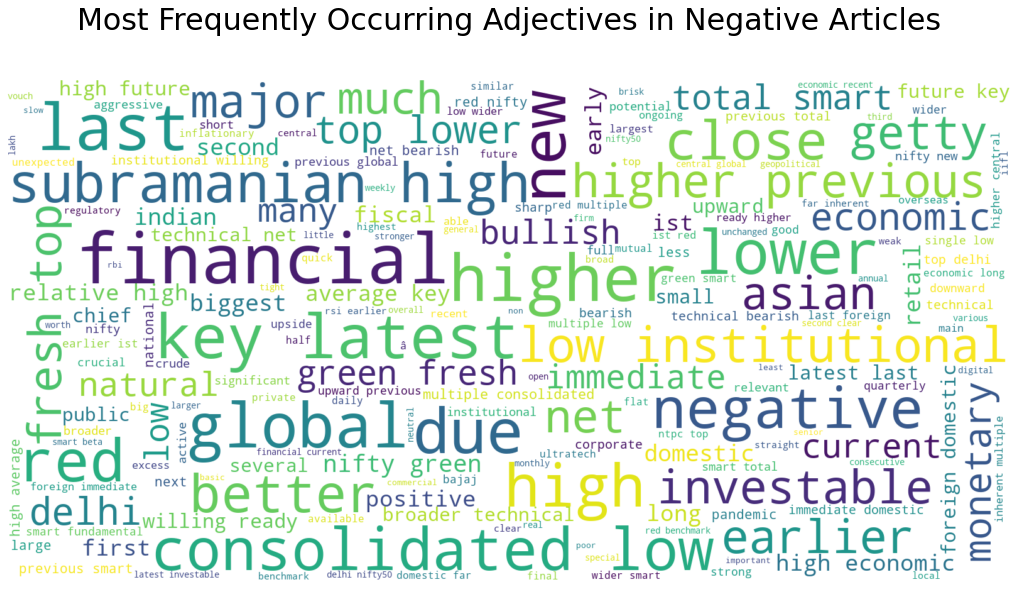

In [251]:
plt.figure(figsize=(18,18))
cloud=WordCloud(max_words=200,width=1600,height=800,background_color='white',max_font_size=110,collocation_threshold=30,stopwords=my_stopwords).generate(neg_adj)
plt.title("Most Frequently Occurring Adjectives in Negative Articles", fontsize=30, pad=50)
plt.axis('off')
plt.imshow(cloud,interpolation='bilinear')
plt.savefig("neg_adj")

In [257]:
#dictionary of top 100 negative adjectives 
negadj_text_dict=cloud.process_text(neg_adj)
negadj_word_frequency={k: v for k,v in sorted(text_dict.items(),reverse=True, key=lambda item: item[1])}
top_100_neg_adj=list(negadj_word_frequency.items())[:100]

In [256]:
top_100_neg_adj

[('key latest', 34),
 ('consolidated low', 31),
 ('subramanian high', 29),
 ('low institutional', 25),
 ('higher previous', 23),
 ('fresh top', 22),
 ('top lower', 21),
 ('green fresh', 20),
 ('total smart', 20),
 ('nifty green', 19),
 ('high economic', 17),
 ('relative high', 17),
 ('average key', 17),
 ('willing ready', 17),
 ('high future', 17),
 ('foreign domestic', 16),
 ('latest last', 16),
 ('future key', 15),
 ('technical net', 15),
 ('broader technical', 15),
 ('multiple consolidated', 15),
 ('previous smart', 14),
 ('high average', 14),
 ('net bearish', 14),
 ('red nifty', 14),
 ('top delhi', 13),
 ('technical bearish', 13),
 ('immediate domestic', 13),
 ('institutional willing', 13),
 ('previous total', 13),
 ('previous global', 12),
 ('smart total', 12),
 ('nifty new', 12),
 ('higher central', 11),
 ('last foreign', 11),
 ('single low', 11),
 ('multiple low', 11),
 ('earlier ist', 11),
 ('smart fundamental', 11),
 ('green smart', 11),
 ('upward previous', 11),
 ('low wider'

In [254]:
neu_adj=' '.join([text for text in neu['adjec_joined']])

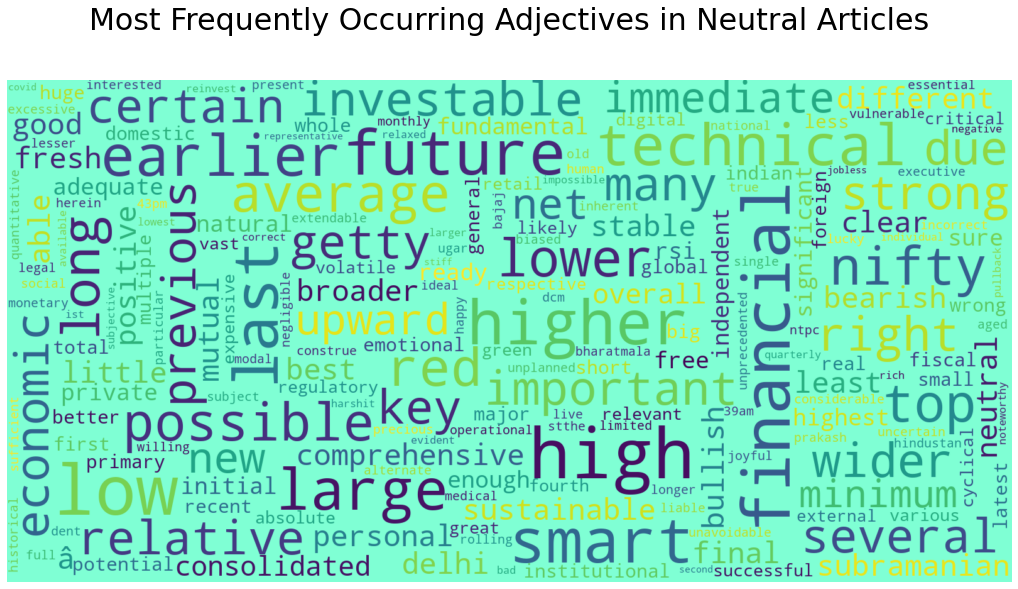

In [266]:
plt.figure(figsize=(18,18))
cloud_neu=WordCloud(max_words=200,width=1600,height=800,background_color='aquamarine',max_font_size=110,collocation_threshold=30,stopwords=my_stopwords).generate(neu_adj)
plt.title("Most Frequently Occurring Adjectives in Neutral Articles", fontsize=30,pad=50)
plt.axis('off')
plt.imshow(cloud_neu,interpolation='bilinear')
plt.savefig("neu_adj")

In [270]:
#dictionary of top 100 neutral adjectives 
neuadj_text_dict=cloud_neu.process_text(neu_adj)
neuadj_word_frequency={k: v for k,v in sorted(neuadj_text_dict.items(),reverse=True, key=lambda item: item[1])}
top_100_neu_adj=list(neuadj_word_frequency.items())[:100]

In [273]:
top_100_neu_adj

[('high', 9),
 ('low', 9),
 ('financial', 8),
 ('future', 7),
 ('last', 7),
 ('higher', 7),
 ('smart', 7),
 ('earlier', 6),
 ('large', 6),
 ('technical', 6),
 ('possible', 5),
 ('red', 5),
 ('nifty', 5),
 ('top', 5),
 ('long', 5),
 ('average', 5),
 ('lower', 5),
 ('important', 4),
 ('several', 4),
 ('certain', 4),
 ('right', 4),
 ('many', 4),
 ('wider', 4),
 ('relative', 4),
 ('investable', 4),
 ('getty', 4),
 ('previous', 4),
 ('economic', 4),
 ('key', 4),
 ('strong', 4),
 ('due', 4),
 ('immediate', 4),
 ('upward', 4),
 ('new', 4),
 ('net', 4),
 ('minimum', 3),
 ('comprehensive', 3),
 ('best', 3),
 ('little', 3),
 ('personal', 3),
 ('good', 3),
 ('mutual', 3),
 ('clear', 3),
 ('stable', 3),
 ('able', 3),
 ('sustainable', 3),
 ('broader', 3),
 ('delhi', 3),
 ('final', 3),
 ('subramanian', 3),
 ('positive', 3),
 ('neutral', 3),
 ('different', 3),
 ('least', 3),
 ('bearish', 3),
 ('bullish', 3),
 ('â', 3),
 ('fresh', 3),
 ('consolidated', 3),
 ('overall', 3),
 ('initial', 2),
 ('independ

In [176]:
pos_adj=' '.join([text for text in pos['adjec_joined']])

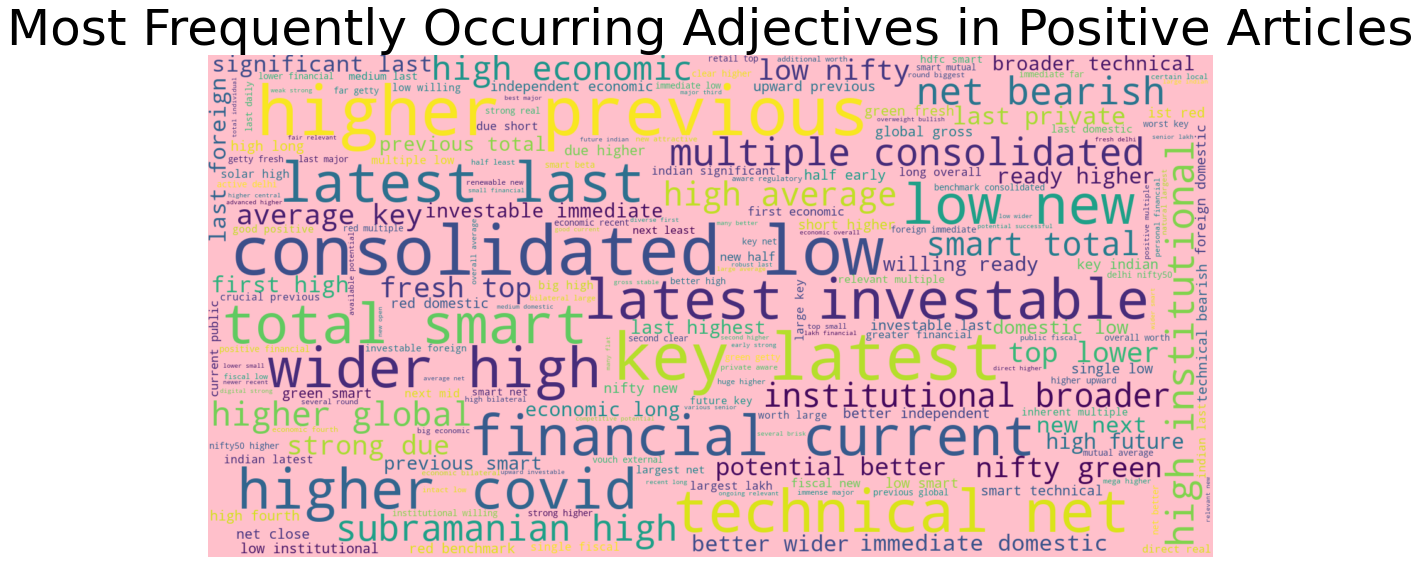

In [278]:
plt.figure(figsize=(18,18))
cloud=WordCloud(max_words=200,width=1600,height=800,background_color='pink',max_font_size=110,collocation_threshold=10,stopwords=my_stopwords).generate(pos_adj)
plt.title("Most Frequently Occurring Adjectives in Positive Articles", fontsize=50)
plt.axis('off')
plt.imshow(cloud,interpolation='bilinear')
plt.savefig("pos_adj")

In [279]:
#dictionary of top 100 positive adjectives 
posadj_text_dict=cloud.process_text(pos_adj)
posadj_word_frequency={k: v for k,v in sorted(posadj_text_dict.items(),reverse=True, key=lambda item: item[1])}
top_100_pos_adj=list(posadj_word_frequency.items())[:100]

In [280]:
top_100_pos_adj

[('consolidated low', 11),
 ('higher previous', 11),
 ('key latest', 10),
 ('technical net', 8),
 ('financial current', 7),
 ('total smart', 7),
 ('low new', 7),
 ('latest last', 7),
 ('higher covid', 7),
 ('wider high', 7),
 ('latest investable', 7),
 ('multiple consolidated', 7),
 ('high institutional', 7),
 ('net bearish', 7),
 ('subramanian high', 7),
 ('high economic', 6),
 ('higher global', 6),
 ('institutional broader', 6),
 ('smart total', 6),
 ('high average', 6),
 ('average key', 6),
 ('top lower', 6),
 ('nifty green', 6),
 ('fresh top', 6),
 ('low nifty', 6),
 ('strong due', 6),
 ('potential better', 5),
 ('last private', 5),
 ('significant last', 5),
 ('immediate domestic', 5),
 ('new next', 5),
 ('first high', 5),
 ('last foreign', 5),
 ('ready higher', 5),
 ('better wider', 5),
 ('high future', 5),
 ('willing ready', 5),
 ('previous total', 5),
 ('economic long', 5),
 ('broader technical', 5),
 ('investable immediate', 5),
 ('previous smart', 5),
 ('last highest', 5),
 ('

Reference:https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb 

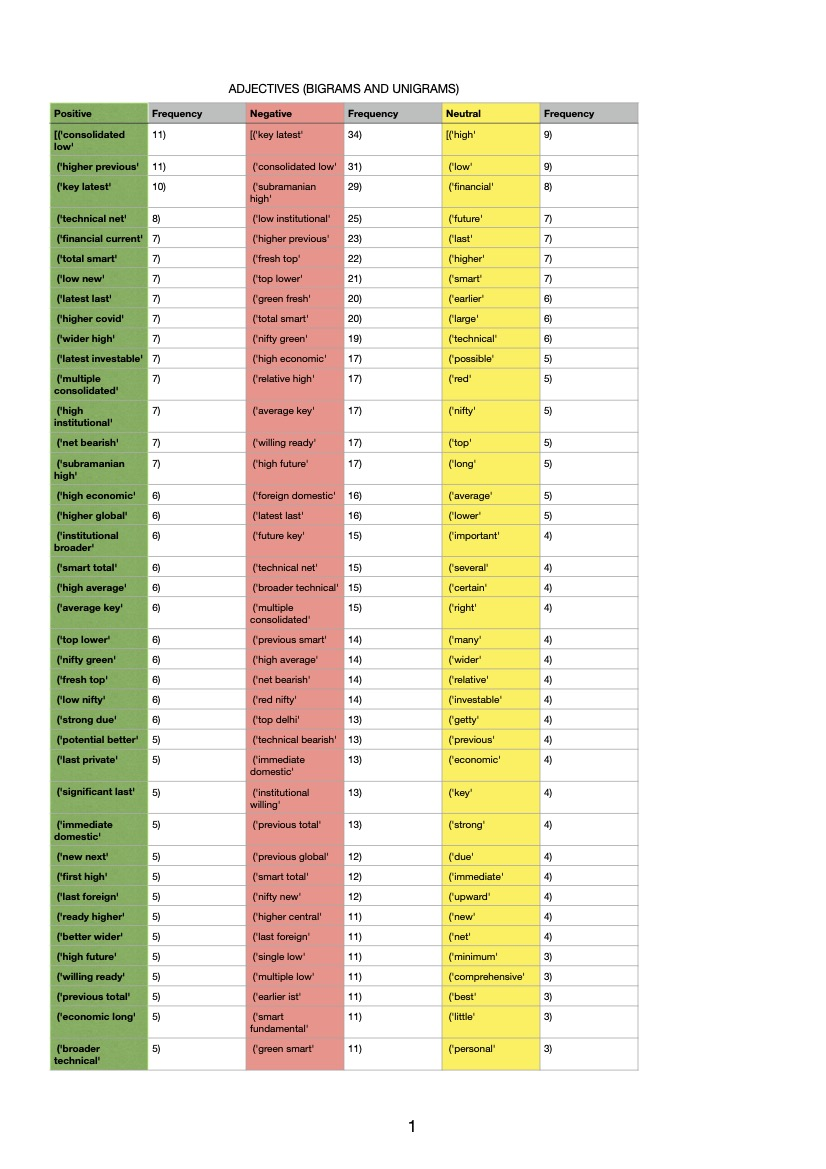


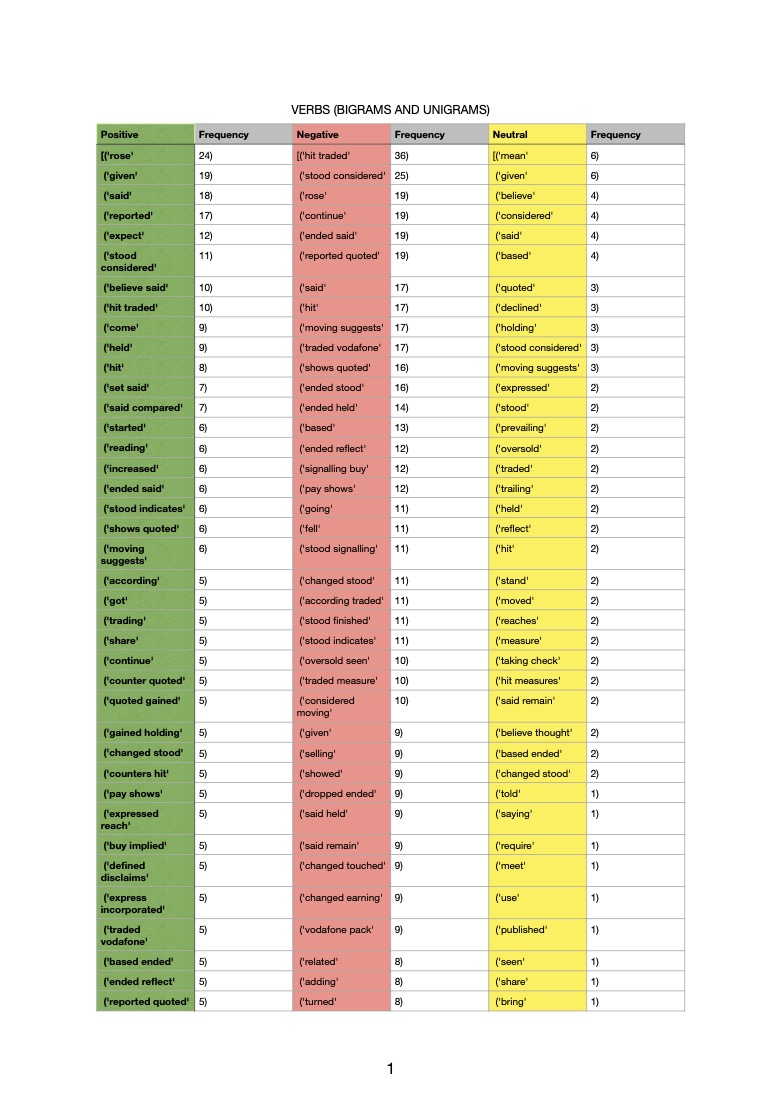

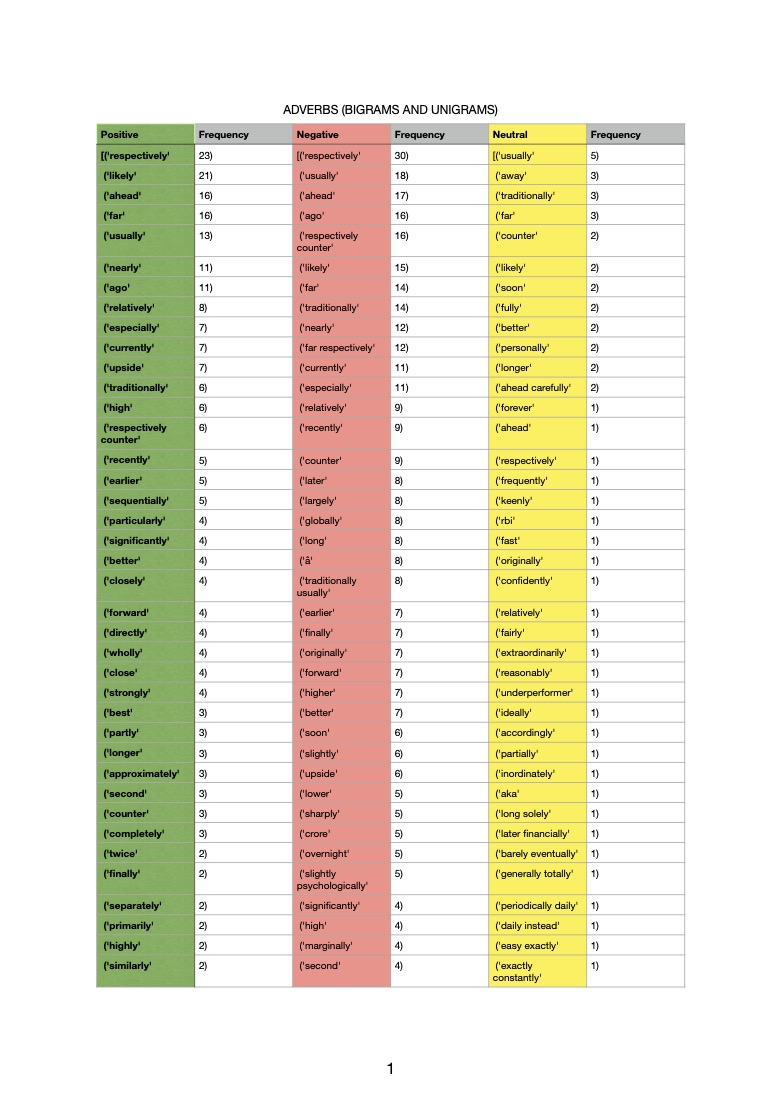